In [1]:
import sys
sys.path.append("../")
sys.path.append("../../algorithms/ga")

In [2]:
import numpy as np
from datetime import datetime
import tsplib95 as tsp

In [3]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm

In [4]:
from tsp_problem import TSP_Problem
from population import Population
from ga import GA

## Problem Qatar
**(optimal tour for the qa194 TSP has length 9352)**. From http://www.math.uwaterloo.ca/tsp/world/qatour.html

### A function to plot
This function plot the fitness of the solution as a function of the number of iteration

In [5]:
def plot_runs(runs, title="title", figsize=(10, 12)):
    '''
    Plot best_fitness = f(fevals) for 10 runs

    Parameters
    ----------
    - logs: A python list: log of 10 runs for
        an optimisation problem. for each run:
        * logs of a run is run[0]
        * duration of run is run[1]
        * best_fitness of run is run[2]
        * best_solution of run is run[3]
    - title: the title of the plot!
    '''

    # Build the plot
    fig, ax = plt.subplots(figsize=figsize)
    plt.axes(ax)
    colors = iter(cm.rainbow(np.linspace(0, 1, len(runs))))
    run_id = 0
    for run in runs:
        run_id = run_id + 1
        color = next(colors)
        duration = "{0}mn:{1}s".format(run[1].seconds//60,
                                       run[1].seconds % 60)

        run_best_fitness = "{0}".format(run[2])
        iteration_best_fitness = [log[1] for log in run[0]]
        x = np.arange(len(iteration_best_fitness))
        
        plt.plot(x, iteration_best_fitness, "k--", color=color,
                 label="run {0:>2}: {1}, best fitness fit={2}".
                 format(run_id, duration, run_best_fitness))

    # Set y lim if required, title and labels
    ax.set_title(title)
    ax.set_xlabel("number of iteration", fontsize=12)
    ax.set_ylabel("best fitness", fontsize=12)
    ax.legend()

### Loading problem

In [6]:
qatar = tsp.load("./data/qa194.tsp")

### Let's look at some cities coordinate

In [7]:
qatar_cities = np.array([qatar.node_coords[city] for city in list(qatar.get_nodes())])
qatar_cities[:2]

array([[24748.3333, 50840.    ],
       [24758.8889, 51211.9444]])

### Create our TSP problem

In [8]:
qatar_pb = TSP_Problem("qa194", qatar_cities)

### Run 10 instances of GA for our problem

In [9]:
population_size = 400
nb_generation = 300
elite_ratio=0.05
selection_op="tournament"
selection_params={"K": 2}
crossover_op="ordered"
crossover_params={"crossover_proba": 0.9, "sequence_max_width": 12}
mutation_op="scramble"
mutation_params={"mutation_proba": 0.1, "sequence_max_width": 6}

In [10]:
verbose=True
runs = []
for run_id in range(5):
    # re-initialise the problem
    # i.e. to get different (random)
    # initial solution
    solutions = Population(qatar_pb, population_size)
    algo = GA(solutions, nb_generation=nb_generation, elite_ratio=elite_ratio,
          selection_op=selection_op, selection_params=selection_params,
          crossover_op=crossover_op, crossover_params=crossover_params,
          mutation_op=mutation_op, mutation_params=mutation_params)
    startt = datetime.now()
    algo.run()
    duration = (datetime.now() - startt)
    runs.append([solutions.logs, duration, int(solutions.best_fitness), solutions.best_individual])
    if verbose:
        print("run {0:2} -> duration: {1}mn:{2}s, best_fitness: {3}".
              format(run_id, duration.seconds//60, duration.seconds%60, int(solutions.best_fitness)))

run  0 -> duration: 11mn:1s, best_fitness: 34386
run  1 -> duration: 10mn:53s, best_fitness: 32661
run  2 -> duration: 11mn:2s, best_fitness: 32961
run  3 -> duration: 10mn:55s, best_fitness: 33663
run  4 -> duration: 11mn:1s, best_fitness: 32501


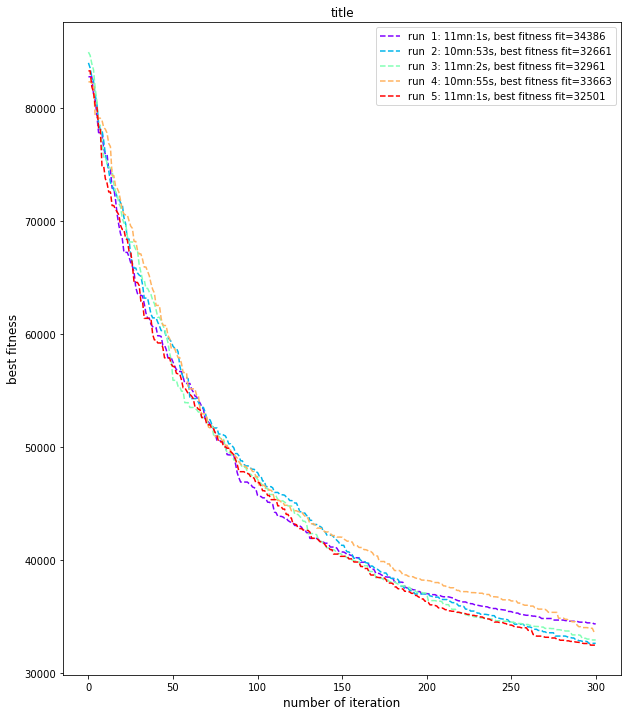

In [11]:
plot_runs(runs, title="title", figsize=(10, 12))

### Get the best overall solution

In [12]:
best_fitness = np.inf
for run in runs:
    if run[2] < best_fitness:
        best_fitness = run[2]
        best_solution = run[3]

In [13]:
path = best_solution.tolist()
path.append(path[0])
print("The best path is : \n{0}".format(path))
print("This path is {0} (distance of unit) long".format(best_fitness))

The best path is : 
[169, 156, 137, 125, 164, 155, 143, 133, 110, 93, 83, 35, 46, 50, 49, 4, 65, 63, 62, 25, 78, 68, 39, 51, 37, 43, 40, 67, 73, 52, 48, 38, 56, 27, 33, 21, 89, 101, 117, 88, 92, 96, 70, 72, 91, 127, 154, 153, 159, 139, 138, 147, 121, 135, 166, 171, 176, 182, 186, 190, 181, 85, 36, 13, 14, 69, 57, 30, 42, 61, 22, 12, 9, 19, 66, 77, 87, 109, 18, 7, 3, 1, 6, 8, 146, 163, 145, 104, 76, 107, 122, 152, 144, 168, 185, 191, 184, 172, 174, 165, 148, 112, 84, 44, 47, 32, 54, 28, 10, 29, 26, 60, 79, 81, 106, 124, 123, 128, 120, 141, 126, 140, 132, 149, 177, 180, 158, 151, 160, 102, 59, 82, 11, 2, 17, 23, 16, 71, 142, 150, 167, 193, 188, 178, 131, 58, 53, 41, 34, 64, 95, 100, 116, 157, 179, 187, 173, 175, 161, 130, 119, 113, 80, 20, 5, 15, 45, 55, 31, 97, 108, 136, 134, 111, 98, 86, 75, 24, 74, 105, 114, 90, 94, 99, 103, 115, 118, 129, 162, 170, 183, 189, 192, 194, 169]
This path is 32501 (distance of unit) long
